# Neighborhood analysis

```{dropdown} <i class="fas fa-brain"></i>&nbsp;&nbsp;&nbsp;Key takeaways

:::{card}
:link: spatial-neighborhood-key-takeaway-1
:link-type: ref
Spatial statistics and neighborhood analysis can be a good first starting point for analyzing spatial omics data.
:::

:::{card}
:link: spatial-neighborhood-key-takeaway-2
:link-type: ref
Analysis tools like Squidpy provide several spatial statistics that help to understand the neighborhood structure in spatial omics datasets.
:::


```

<!-- START ENV-SETUP -->
``````{dropdown} <i class="fa-solid fa-gear"></i>   Environment setup
`````{tab-set}

````{tab-item} Steps
```{include} ../_static/default_text_env_setup.md
```
````

````{tab-item} yml
```{literalinclude} spatial.yml
:language: yaml
```
````

`````
``````
<!-- END ENV-SETUP -->

(spatial-neighborhood-key-takeaway-1)=
(spatial-neighborhood-key-takeaway-2)=
## Motivation
After annotating cell types or cell states in the dataset (or spots, according to the technology at end), we can quantify whether such annotations are spatially enriched and analyze cellular neighborhoods across the tissue.

Cellular neighborhood analysis is a good starting point for various downstream tasks as it can help to understand the cellular composition of the tissue and identify candidates for more in-depth analysis. For example, it can help to find candidates for cell-cell communication based on spatial proximity, or spatial regions and clusters for identification of spatially variable genes. 

Neighborhood analysis is often performed through **spatial statistics** {cite}`gelfand2010handbook`, which are quantitative scores that can be used to identify spatial neighborhoods in the tissue. Here, we'll take a look at various spatial statistics implemented in Squidpy {cite}`Palla2022`.

## Environment setup and data

We first load the respective packages needed in this tutorial and the dataset.

In [7]:
import scanpy as sc
import squidpy as sq

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80, facecolor="white")

The dataset used in this tutorial consists of 1 tissue slides from 1 mouse and is provided by [10x Genomics Space Ranger 1.1.0](https://support.10xgenomics.com/spatial-gene-expression/datasets/1.1.0/V1_Adult_Mouse_Brain). The dataset was pre-processed in Squidpy, which provides a loading function for this dataset. 

In [8]:
adata = sq.datasets.visium_hne_adata()

## Identifying interactions between spatial communities
After annotating cell types or cell states in the dataset (or spots, according to the technology at end), we can quantify whether such annotations are spatially enriched. To this end, computing a neighborhood enrichment can help us identify clusters that are neighbors in the tissue of interest. In short, it’s an enrichment score on spatial proximity of clusters: if observations (cells or spots) belonging to a cluster are often close to observations belonging to another cluster, then they will have a high score and will appear to be enriched. On the other hand, if they are far apart, and therefore are seldom neighbors, the score will be low and they can be defined as depleted. This score is based on a permutation-based test, and you can set the number of permutations with the n_perms argument (default is 1000).

Since the function works on a spatial connectivity matrix (spatial graph), we need to compute that as well. This can be done with `squidpy.gr.spatial_neighbors()`.

In [9]:
sq.gr.spatial_neighbors(adata)

Creating graph using `grid` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:01)


We can now run the neighborhood enrichment test by providing the annotation key in `adata.obs`.

In [10]:
sq.gr.nhood_enrichment(adata, cluster_key="cluster")

Calculating neighborhood enrichment using `1` core(s)


  0%|          | 0/1000 [00:00<?, ?/s]

Adding `adata.uns['cluster_nhood_enrichment']`
Finish (0:00:00)


The method added `adata.uns['cluster_nhood_enrichment']` to our AnnData object. 

In [13]:
adata.uns["cluster_nhood_enrichment"]

{'zscore': array([[ 70.22155762, -13.6041789 ,  -0.4258425 ,   2.94739732,
          -9.03708733, -12.44368289,  -8.94699794, -12.42056733,
          -9.76328672,  -8.53570662,  -5.34106034,  -6.81758862,
         -10.46793569, -13.79518632, -11.85984283],
        [-13.6041789 ,  74.34650092,  -6.37460975,  -9.11260235,
           1.92787693, -12.0461501 , -11.90907953, -11.42070949,
          -8.79949063,  -7.03693412,  -5.27623436,  -6.33541649,
          -3.39758871, -13.09498141, -11.02100047],
        [ -0.4258425 ,  -6.37460975,  71.02312621, -10.2557408 ,
          -8.38252823,  -3.56904737, -11.60339076, -11.17301353,
          -8.63097371,  -8.04109503,  -4.88912876,  -6.29768401,
          -7.40871581, -12.6590886 , -10.5828295 ],
        [  2.94739732,  -9.11260235, -10.2557408 ,  57.83928709,
          14.41213846,  -9.54187862,  -9.20031921,  -9.36357782,
          -7.19965825,  -6.49172687,  -4.07412227,  -5.14772134,
          -7.55767703, -10.34784232,  -8.81768536],
  

The added object contains two arrays. The first stored under `zscore` contains the enrichment z-score for each cell-cell interaction. The second is stored under `count` and represents the enrichment count.

Finally, we’ll directly visualize the results with `squidpy.pl.nhood_enrichment()`.

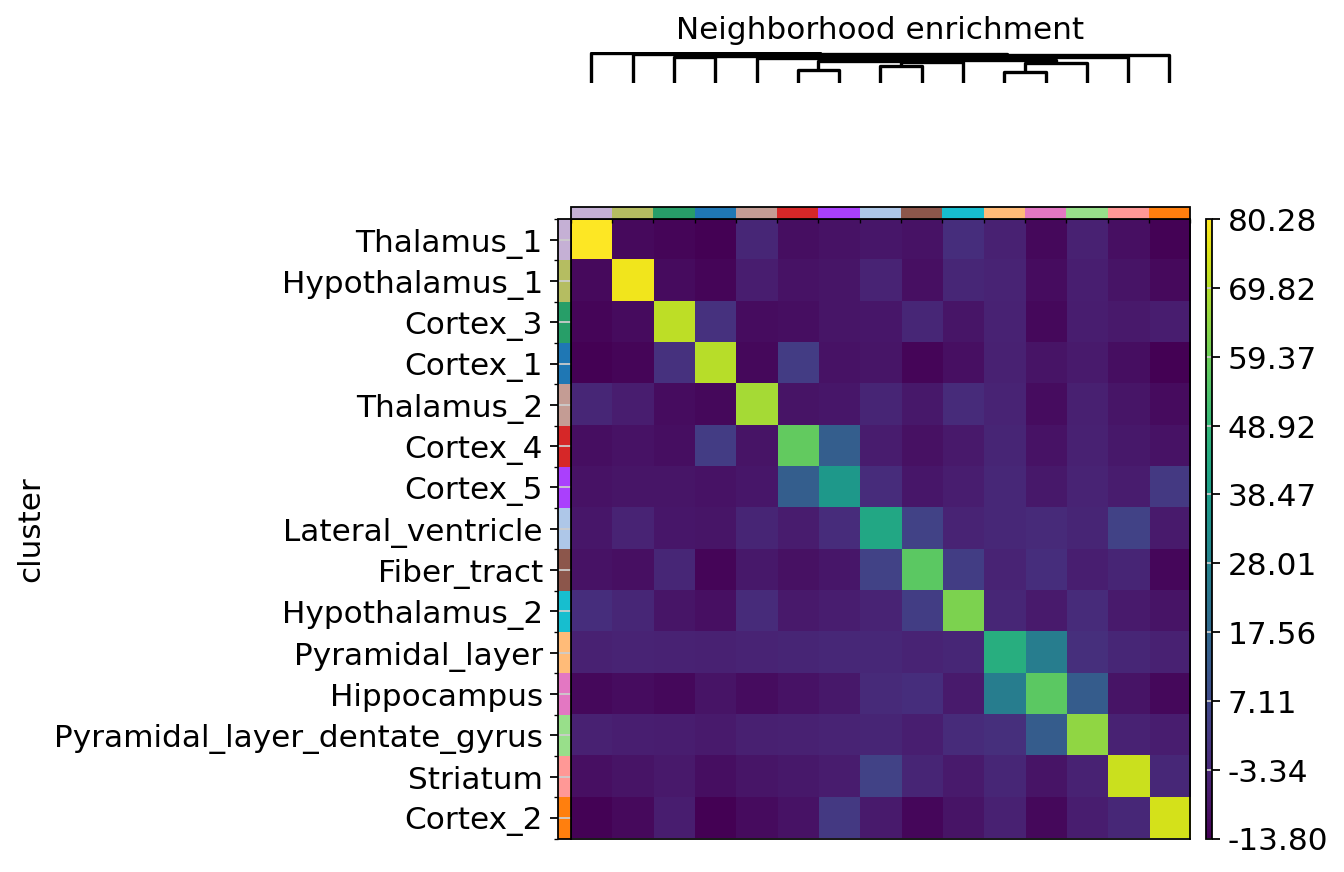

In [14]:
sq.pl.nhood_enrichment(adata, cluster_key="cluster", method="average", figsize=(5, 5))

From the above plot, we can see that there seems to be an enrichment for clusters of the `Pyramidal_layer` and `Dentate_gyrus`. By looking at the spatial scatterplot above, we can confirm that these clusters are indeed "neighbors" as their members are often close.



A similar approach to such problem is computing what we call an *interaction matrix*, that is, the sum of all connecting observations between clusters in tissue. The approach is related to the neighborhood enrichment analysis yet it is not a test, but should be viewed as a simple summary statistics of the spatial graph.
Let's take a look at how the interaction matrix looks like for the dataset.


In [15]:
sq.gr.interaction_matrix(adata, cluster_key="cluster")

Adding `adata.uns['cluster_interactions']`


The function added `adata.uns['cluster_interactions']` to our AnnData object, which contains the number of interactions between two clusters with respect to the provided spatial connectivities graph.

In [18]:
adata.uns["cluster_interactions"]

array([[1.352e+03, 1.000e+00, 1.450e+02, 1.280e+02, 4.000e+00, 4.000e+00,
        4.000e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 1.290e+03, 6.700e+01, 9.000e+00, 8.700e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 7.000e+00, 0.000e+00, 0.000e+00,
        5.500e+01, 0.000e+00, 0.000e+00],
       [1.450e+02, 6.700e+01, 1.140e+03, 0.000e+00, 2.000e+00, 8.300e+01,
        3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.800e+01, 0.000e+00, 0.000e+00],
       [1.280e+02, 9.000e+00, 0.000e+00, 6.780e+02, 1.400e+02, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00],
       [4.000e+00, 8.700e+01, 2.000e+00, 1.400e+02, 3.300e+02, 0.000e+00,
        6.000e+00, 0.000e+00, 0.000e+00, 2.000e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00],
       [4.000e+00, 0.000e+00, 8.300e+01, 0.000e+00

We can visualize the results with `squidpy.pl.interaction_matrix()`.

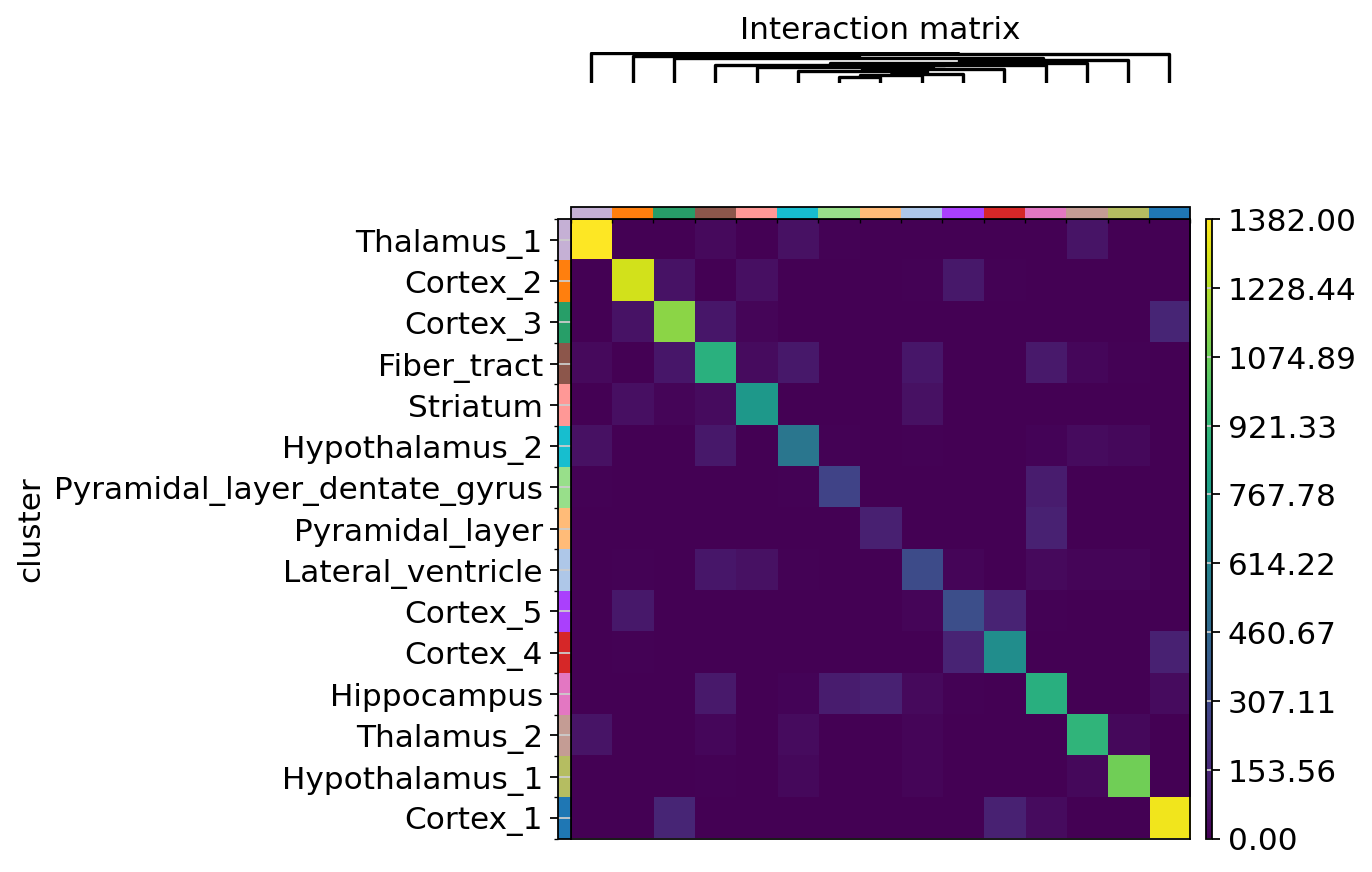

In [16]:
sq.pl.interaction_matrix(adata, cluster_key="cluster", method="average", figsize=(5, 5))

For the dataset, we roughly recapitulate the neighborhood enrichment test, yet we seem to not observe a particularly strong interaction between the `Pyramidal_layer` and `Dentate_gyrus` clusters. 
One explanation for such a result is that the number of observations of such clusters is low, hence the low number of interactions.


## Co-occurrence across spatial dimensions

Another spatial statistic that can be computed on cell type annotations in spatial coordinates is what we call the co-occurrence score {cite}`Tosti2021,Palla2022`. The co-occurrence score gives us an indication on whether clusters co-occur with each other at increasing distances across the tissue.
The co-occurrence score is defined as:

$\frac{p(exp|cond)}{p(exp)}$

where $p(exp|cond)$ is the conditional probability of observing a cluster $exp$ conditioned
on the presence of a cluster $cond$ whereas $exp$ is the probability of observing $exp$
in the radius size of interest. The score is computed across increasing radii size around each observation (i.e. spots here) in the tissue.



Calculating co-occurrence probabilities for `50` intervals `1` split combinations using `1` core(s)


  0%|          | 0/1 [00:00<?, ?/s]

Adding `adata.uns['cluster_co_occurrence']`
Finish (0:00:00)


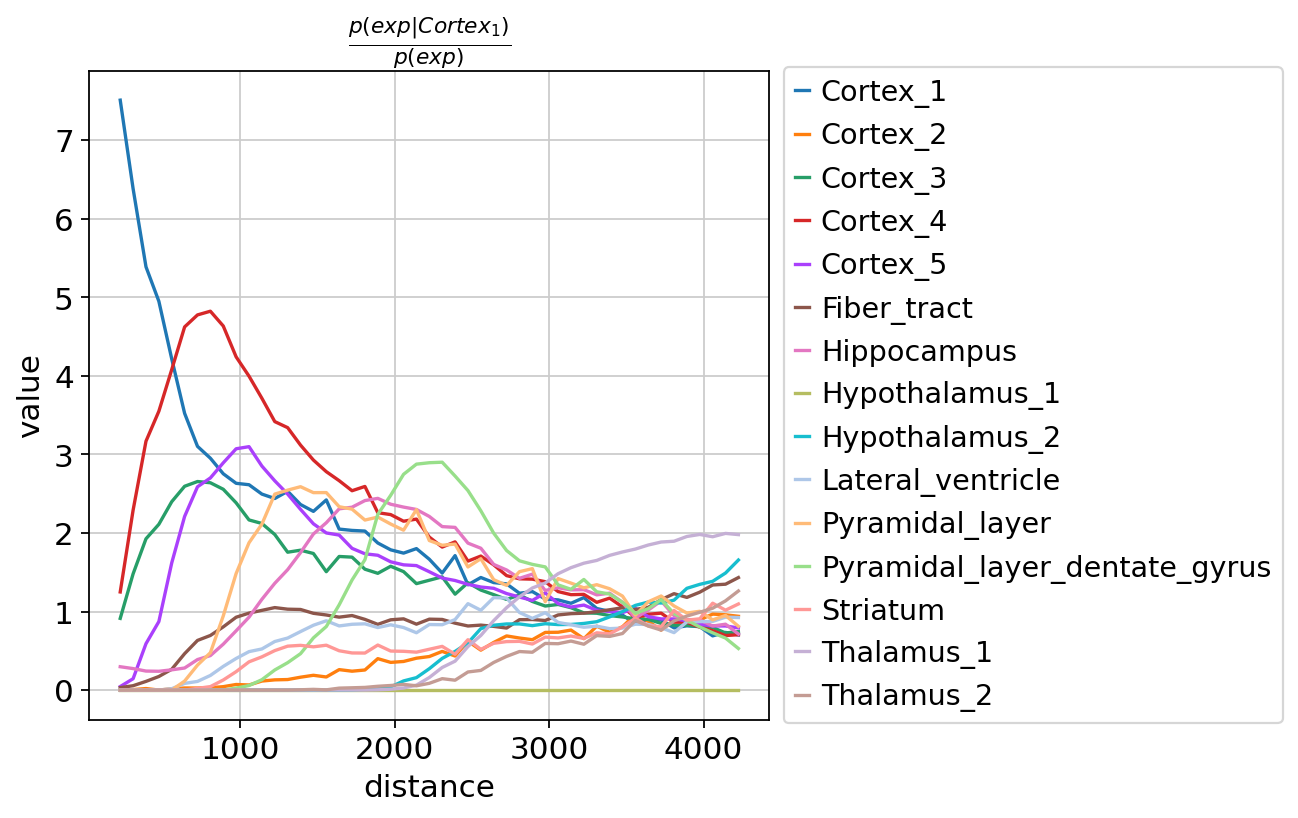

In [5]:
sq.gr.co_occurrence(adata, cluster_key="cluster")
sq.pl.co_occurrence(adata, cluster_key="cluster", clusters="Cortex_1", figsize=(8, 5))

Here, we selected to visualize the cluster `Cortex_1` to visualize how at close distances, the cluster co-occur with the other `Cortex` clusters, as expected.

## References

```{bibliography}
:filter: docname in docnames
:labelprefix: spatial
```

## Contributors
### Authors
* Giovanni Palla

### Reviewers
* Anna Schaar
* Lukas Heumos